In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [2]:
crossval_infrates = cvc.CrossValidation(
                                ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv',
                                ExternalObservableInfo = {'Country':'Country','Observable':'Growth rate','Date':'Date','date_offset':0,'Cases':'Confirmed','readcsv':{'sep':';'},'dropna':['R']},
                                resolve_US_states = True,
                                FinalDateFromDB = True,
                                FinalDateExtendWithShiftdays = True)

crossval_rt = cvc.CrossValidation(
                                ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv',
                                ExternalObservableInfo = {'Country':'Country','Observable':'R','Date':'Date','date_offset':0,'Cases':'Confirmed','readcsv':{'sep':';'},'dropna':['R']},
                                resolve_US_states = True,
                                FinalDateFromDB = True,
                                FinalDateExtendWithShiftdays = True)

In [3]:
shiftdaylist  = np.arange(6)*5
alphalist     = np.power(10,np.linspace(-4,-1,num = 7))
crossvalcount = 10


crossval_infrates.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)


  0 0.000100        16:30:22
  0 0.000316        16:30:52
  0 0.001000        16:31:14
  0 0.003162        16:31:25
  0 0.010000        16:31:33
  0 0.031623        16:31:40
  0 0.100000        16:31:47
  5 0.000100        16:32:41
  5 0.000316        16:33:14
  5 0.001000        16:33:37
  5 0.003162        16:33:50
  5 0.010000        16:33:59
  5 0.031623        16:34:08
  5 0.100000        16:34:15
 10 0.000100        16:35:19
 10 0.000316        16:35:59
 10 0.001000        16:36:21
 10 0.003162        16:36:37
 10 0.010000        16:36:49
 10 0.031623        16:36:57
 10 0.100000        16:37:03
 15 0.000100        16:38:00
 15 0.000316        16:38:39
 15 0.001000        16:38:58
 15 0.003162        16:39:09
 15 0.010000        16:39:18
 15 0.031623        16:39:25
 15 0.100000        16:39:31
 20 0.000100        16:40:30
 20 0.000316        16:41:04
 20 0.001000        16:41:20
 20 0.003162        16:41:32
 20 0.010000        16:41:42
 20 0.031623        16:41:49
 20 0.100000  

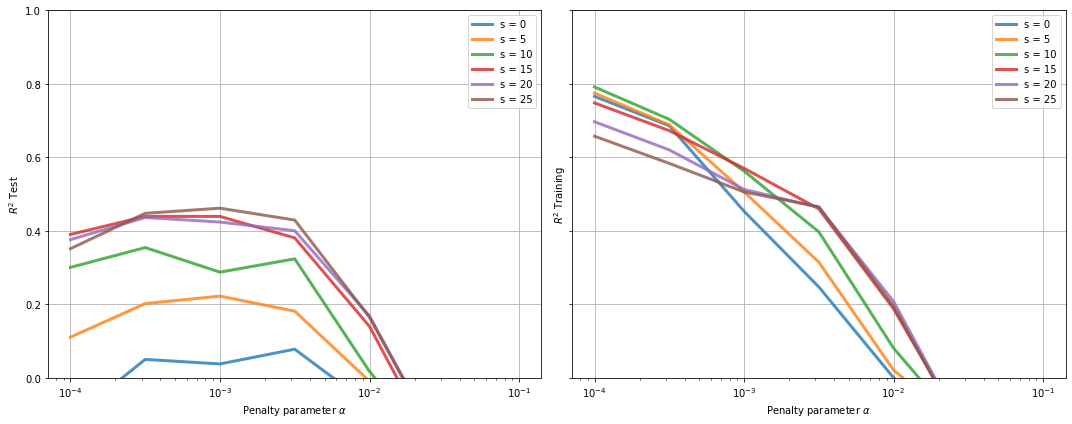

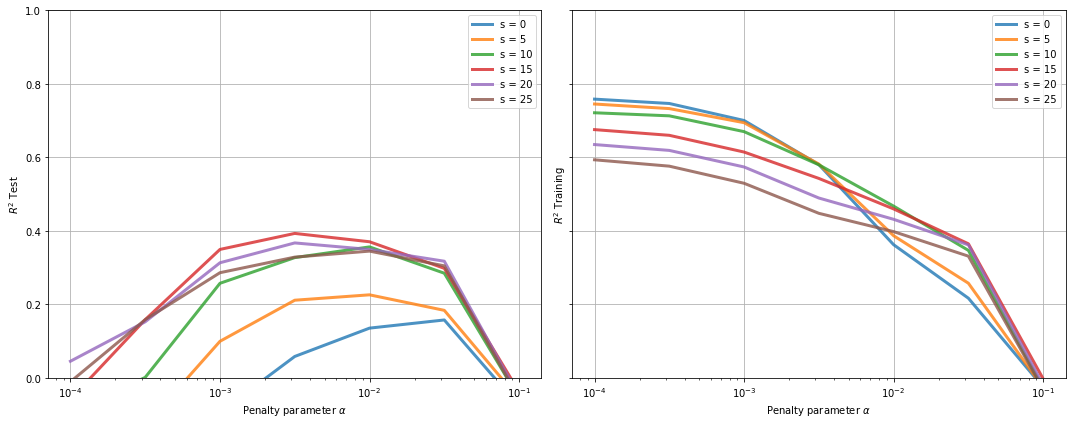

In [5]:
crossval_infrates.PlotCVresults()
crossval_rt.PlotCVresults()

In [6]:
crossval_infrates.ComputeFinalModels(modelparameters=[(15,10**-3.25)])
crossval_rt.ComputeFinalModels(modelparameters=[(15,10**-2.5)])

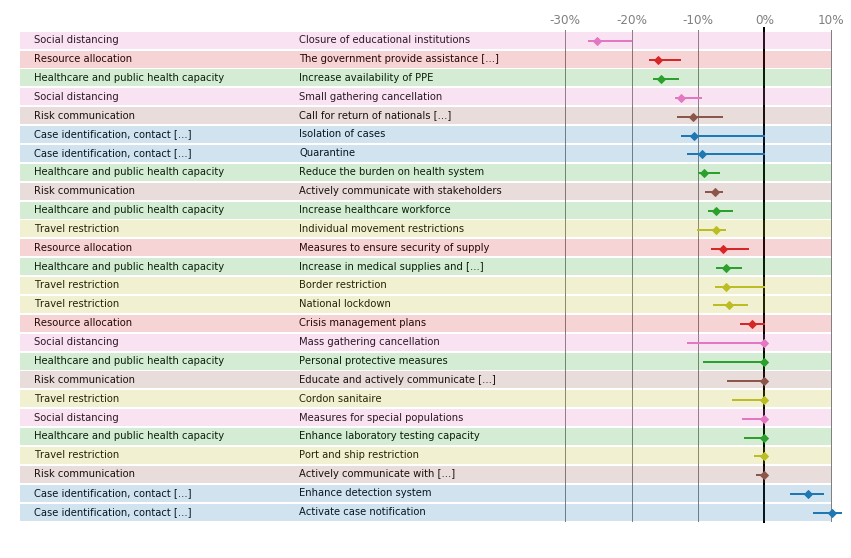

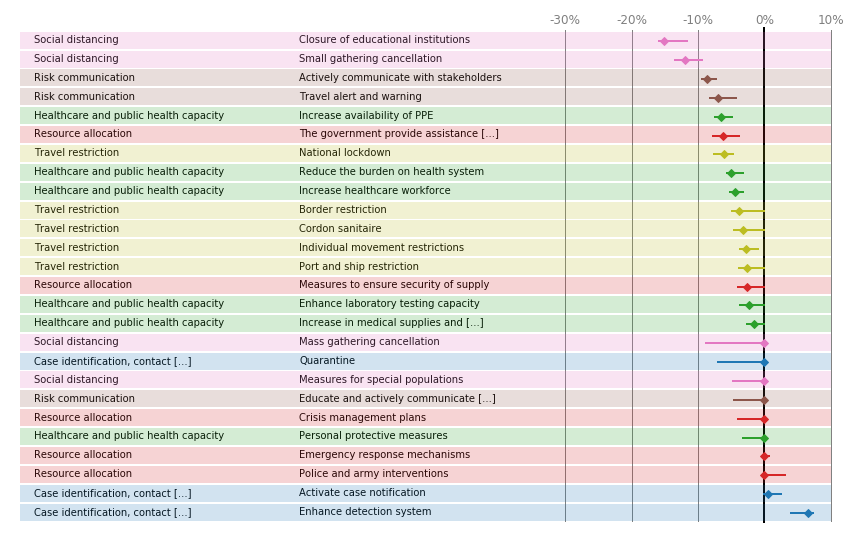

In [9]:
crossval_infrates.PlotMeasureListSorted(drop_zeros = True, figsize = (15,10))
crossval_rt.PlotMeasureListSorted(drop_zeros = True, figsize = (15,10))


In [ ]:
crossval_infrates.PlotPrevalenceEffects()